In [85]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel


In [506]:
sub = pd.read_csv('C:/Users/acorn/Desktop/홍동균/gender_submission.csv')
# X_test = pd.read_csv('C:/Users/acorn/Desktop/홍동균/test.csv')
# train_df = pd.read_csv('C:/Users/acorn/Desktop/홍동균/train.csv')

In [169]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [434]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [435]:
train_df.Age = train_df['Age'].fillna(train_df['Age'].mean()).astype(int)
X_test.Age = X_test['Age'].fillna(X_test['Age'].mean()).astype(int)
train_df = train_df.drop(['Name','Ticket','Cabin','Embarked'],axis = 1 ,inplace = False)
X_test = X_test.drop(['Name','Ticket','Cabin','Embarked'], axis = 1, inplace = False)


train_df['Family'] = train_df.SibSp + train_df.Parch
X_test['Family'] = X_test.SibSp + X_test.Parch
train_df = train_df.drop(['SibSp','Parch'],axis = 1 ,inplace = False)
X_test = X_test.drop(['SibSp','Parch'],axis = 1 ,inplace = False)

<Axes: ylabel='Fare'>

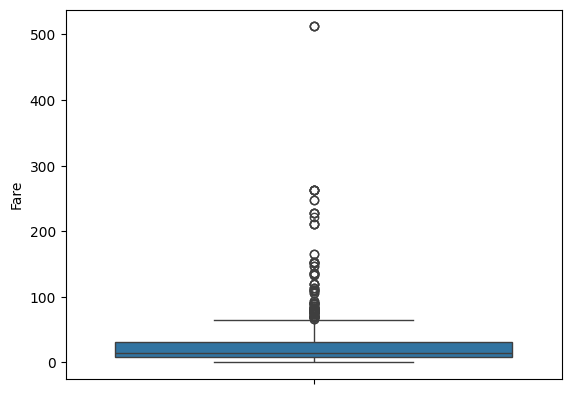

In [436]:
sns.boxplot(train_df.Fare)

In [437]:
# train_df = train_df[train_df.Fare < 300]
# X_test = X_test[X_test.Fare < 300]

In [438]:
y_train = train_df.Survived
X_train = train_df.drop('Survived',axis = 1, inplace = False)

In [439]:
X_train.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Family         0
dtype: int64

In [440]:
encoder = LabelEncoder()
X_train.Sex = encoder.fit_transform(X_train.Sex)

In [441]:
X_train.Sex.value_counts()
# 1 = Male, 0 = Female

Sex
1    577
0    314
Name: count, dtype: int64

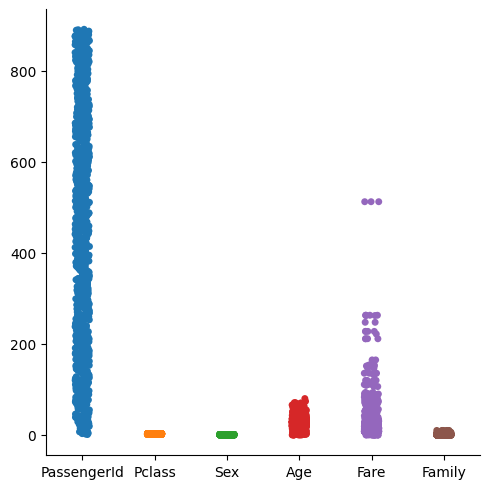

In [442]:
sns.catplot(X_train)

<Axes: xlabel='Age', ylabel='Count'>

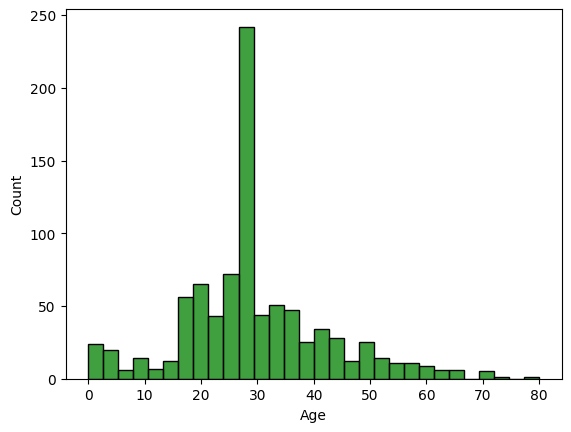

In [443]:
sns.histplot(X_train.Age, color='g')

<Axes: xlabel='Fare', ylabel='Count'>

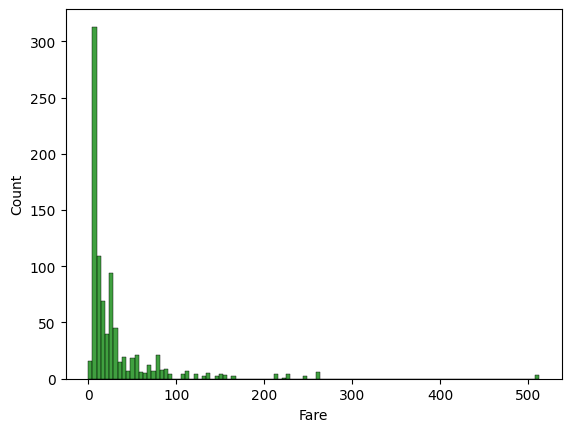

In [444]:
sns.histplot(X_train.Fare, color = 'g')

In [445]:
X_train['log_var'] = np.log(X_train['Fare'] + 1e-8)  # 1e-8을 추가하여 로그(0) 방지
X_train['variable_squared'] = X_train['Fare'] ** 2

In [446]:
# 1. 선형성 검정 (Box-Tidwell test)

import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train,X_train_const).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.440275
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                    월, 09 9 2024   Pseudo R-squ.:                  0.3388
Time:                        14:00:10   Log-Likelihood:                -392.29
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.709e-82
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.8479      0.639      7.581      0.000       3.595       6.101
PassengerId

In [451]:
# Fare 변수 제외 
X_train = X_train.drop(['Fare','log_var','variable_squared'],axis=1, inplace = False)
X_test = X_test.drop('Fare',axis=1, inplace = False)


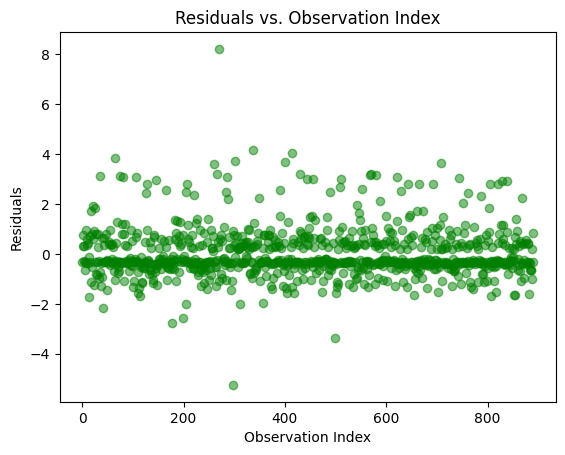

In [452]:
#3.독립성 검정
residual = logit_model.resid_pearson

plt.plot(residual, marker = 'o', linestyle = 'none', color = 'g', alpha = .5)
plt.title('Residuals vs. Observation Index')
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.show()

In [453]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
logit_model = sm.Logit(y_train,X_train_const).fit()


Optimization terminated successfully.
         Current function value: 0.444609
         Iterations 6


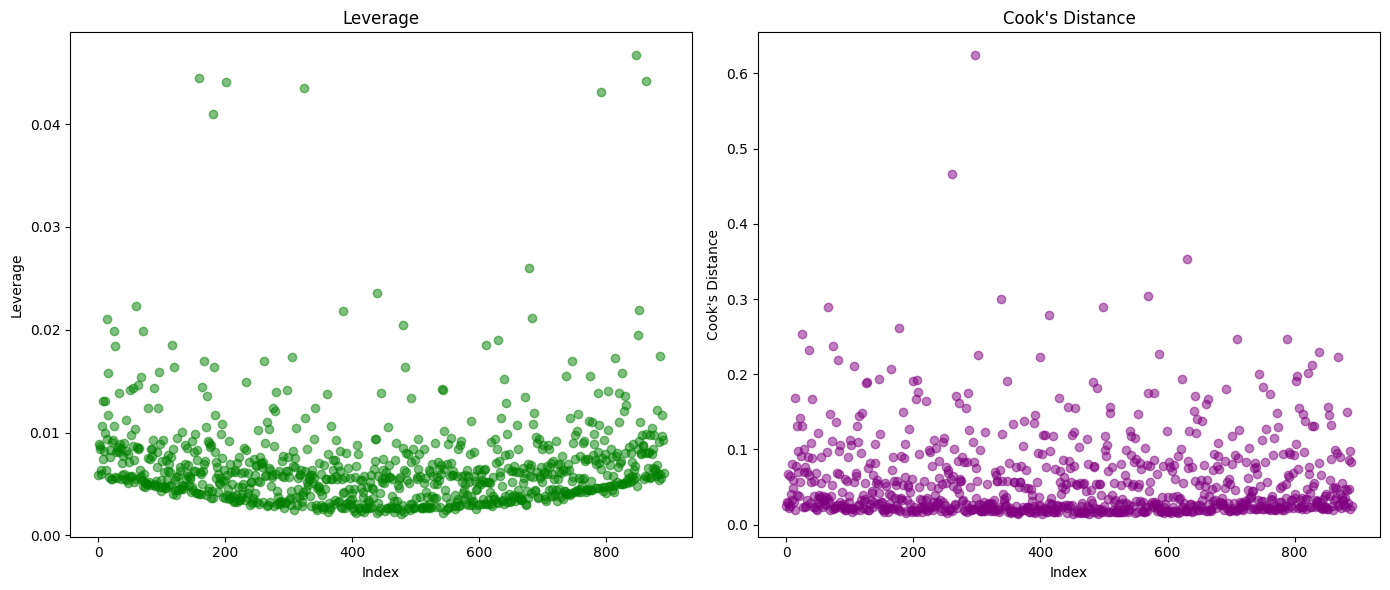

In [454]:
#이상치 및 영향력 있는 관측치 
def compute_influence(logit_model, X):
    """ Compute influence measures for Logit model """
    # 모델의 예측 확률
    pred_probs = logit_model.predict(X)
    
    # 잔차 계산 (Pearson residuals)
    residuals = (y_train - pred_probs) / np.sqrt(pred_probs * (1 - pred_probs))
    
    # Leverage 계산
    H = np.dot(X, np.linalg.pinv(np.dot(X.T, X))).dot(X.T)
    leverage = np.diag(H)
    
    # Cook's Distance 계산
    influence = np.sqrt((residuals**2) * leverage / (1 - leverage))
    
    return leverage, influence

leverage, cooks_distance = compute_influence(logit_model, X_train_const)

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(leverage)), leverage, alpha=0.5,color = 'g')
plt.title('Leverage')
plt.xlabel('Index')
plt.ylabel('Leverage')

plt.subplot(1, 2, 2)
plt.scatter(range(len(cooks_distance)), cooks_distance, alpha=0.5,color = 'purple')
plt.title("Cook's Distance")
plt.xlabel('Index')
plt.ylabel("Cook's Distance")

plt.tight_layout()
plt.show()

In [455]:
#다중공선성 확인 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_const = sm.add_constant(X_train)

vif = pd.DataFrame()
vif['Variable'] = X_train_const.columns
vif['VIF'] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

print(vif)

      Variable        VIF
0        const  25.394650
1  PassengerId   1.004486
2       Pclass   1.161397
3          Sex   1.075903
4          Age   1.204871
5       Family   1.104696


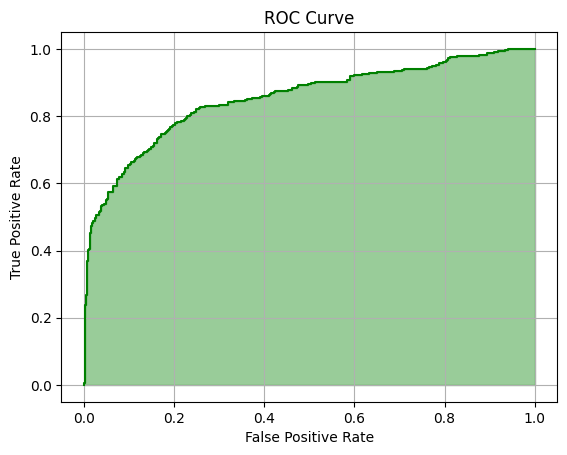

ROC AUC: 0.8523


In [456]:
# 모델 적합도 검정
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = logit_model.predict(X_train_const)
roc_auc = roc_auc_score(y_train, y_pred_prob)
fpr, tpr, _ = roc_curve(y_train, y_pred_prob)

plt.plot(fpr, tpr, color = 'g')
plt.fill_between(fpr, tpr, color='g', alpha=0.4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

print(f"ROC AUC: {roc_auc:.4f}")


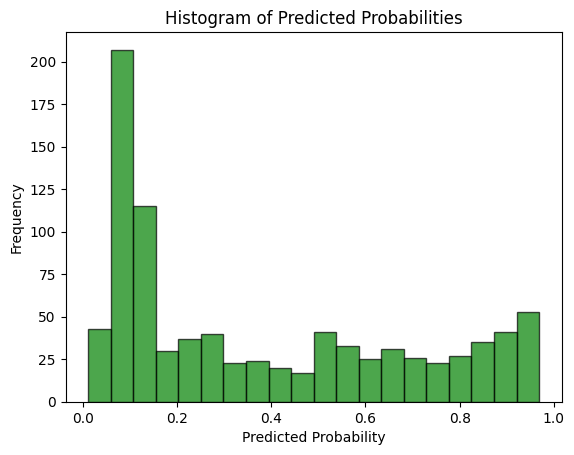

In [457]:
plt.hist(y_pred_prob, bins=20, edgecolor='k', alpha=0.7, color = 'g')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

In [458]:
# 예측 확률을 이진 분류로 변환
y_pred = (y_pred_prob > 0.5).astype(int)

# 예측된 클래스 출력
print("Predicted Classes:")
print(y_pred)


Predicted Classes:
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Length: 891, dtype: int64


In [407]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 교차 검증을 위한 로지스틱 회귀 모델
logit_model_sklearn = LogisticRegression()

# 교차 검증 수행
scores = cross_val_score(logit_model_sklearn, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {scores.mean()}')


Cross-Validation Accuracy: 0.7912372104701525


In [408]:
# 회귀 계수 출력
print("Coefficients:")
print(logit_model.params)

# Odds Ratio
odds_ratios = np.exp(logit_model.params)
print("Odds Ratios:")
print(odds_ratios)


Coefficients:
const          5.168824
PassengerId    0.000128
Pclass        -1.172581
Sex           -2.789688
Age           -0.039408
Family        -0.217771
dtype: float64
Odds Ratios:
const          175.708003
PassengerId      1.000128
Pclass           0.309567
Sex              0.061440
Age              0.961358
Family           0.804310
dtype: float64


In [409]:
# X_test_const = X_test_const.drop('PassengerId', axis = 1, inplace = False)
X_test_const

,const,PassengerId,Pclass,Sex,Age,Family
0,1.0,892,3,male,34,0
1,1.0,893,3,female,47,1
2,1.0,894,2,male,62,0
3,1.0,895,3,male,27,0
4,1.0,896,3,female,22,2
...,...,...,...,...,...,...
413,1.0,1305,3,male,30,0
414,1.0,1306,1,female,39,0
415,1.0,1307,3,male,38,0
416,1.0,1308,3,male,30,0


In [410]:
X_test_const.Sex = encoder.fit_transform(X_test_const['Sex'])

In [411]:
print(X_train_const.shape)
print(X_test_const.shape)

(891, 6)
(418, 6)


In [412]:
predictions = logit_model.predict(X_test_const)
print(predictions)

0      0.085959
1      0.424513
2      0.091571
3      0.110292
4      0.613856
         ...   
413    0.104017
414    0.932575
415    0.078105
416    0.104053
417    0.069889
Length: 418, dtype: float64


In [432]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [420]:
sub = sub.drop('Survived', axis = 1, inplace = False)

In [462]:

X_train = X_train.drop('PassengerId',axis=1,inplace =False)

In [465]:
X_test = X_test.drop('PassengerId',axis=1,inplace=False)

In [471]:
lr = LogisticRegression()
lr.fit(X_train_const,y_train)


c:\Users\acorn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [474]:
X_test_const.Sex = encoder.fit_transform(X_test_const.Sex)

In [505]:
predict = lr.predict(X_test_const)
predict = pd.DataFrame(predict)
predict

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [508]:
sub = sub.drop('Survived', axis = 1, inplace=False)


In [519]:
# final_sub_file = pd.concat([sub,predict], axis = 1)
final_sub_file.rename(columns={final_sub_file.columns[1]: 'Survived'}, inplace=True)



In [524]:
final_sub_file.to_csv('final_sub_file.csv', index = False)

In [525]:
final_sub_file

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [526]:
from sklearn.ensemble import RandomForestClassifier

In [527]:
model = RandomForestClassifier()


In [528]:
model.fit(X_train,y_train)
predict = model.predict(X_test)
predict = pd.DataFrame(predict)
predict

,0
0,0
1,0
2,1
3,1
4,1
...,...
413,0
414,1
415,0
416,0


In [529]:
model

RandomForestClassifier()